In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import image_interpolation
import datetime
tf.config.list_physical_devices('GPU')

2022-10-10 21:34:18.673025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 21:34:18.888502: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-10 21:34:19.807679: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-10 21:34:19.807810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train,test=tf.keras.datasets.cifar10.load_data()
x_train,y_train=train
x_test,y_test=test
x_train, x_test = x_train / 255.0, x_test / 255.0
print("input shape: ",x_train.shape)
print("output shape: ",y_train.shape)
x_train[0].max()

input shape:  (50000, 32, 32, 3)
output shape:  (50000, 1)


1.0

In [5]:
input=tf.keras.Input(shape=(None, None,3))
num_iterations=10
repeated_input = tf.repeat(tf.expand_dims(input,1), repeats=num_iterations, axis=1)
classifier=tf.keras.Sequential([
    tf.keras.layers.RNN(image_interpolation.ImageSectionRNNCell(grid_dim=(8, 8), units=32,section_processor=tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding="same"),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu')
    ]),)),
    tf.keras.layers.Dense(10, activation='softmax')
])
output=classifier(repeated_input)
model=tf.keras.Model(inputs=input, outputs=output)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 1, None, None, 3)  0        
 a)                                                              
                                                                 
 tf.repeat_1 (TFOpLambda)    (None, 10, None, None, 3  0         
                             )                                   
                                                                 
 sequential_5 (Sequential)   (None, 10)                33421     
                                                                 
Total params: 33,421
Trainable params: 33,421
Non-trainable params: 0
_________________________________________________________________


In [6]:


log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)
with tf.device('/GPU:0'):
    model.compile(optimizer='adam', metrics=[
                  'accuracy'], loss='sparse_categorical_crossentropy')
    model.fit(x_train, y_train, epochs=4, batch_size=8,
              validation_data=(x_test, y_test),  callbacks=[tensorboard_callback])


2022-10-10 21:43:09.427689: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-10-10 21:43:09.933802: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
6250/6250 [==============================] - 556s 85ms/step - loss: 1.7828 - accuracy: 0.3276 - val_loss: 1.5663 - val_accuracy: 0.4162
Epoch 2/10
6250/6250 [==============================] - 525s 84ms/step - loss: 1.5163 - accuracy: 0.4417 - val_loss: 1.4309 - val_accuracy: 0.4741
Epoch 3/10
6250/6250 [==============================] - 533s 85ms/step - loss: 1.4070 - accuracy: 0.4849 - val_loss: 1.4062 - val_accuracy: 0.4935
Epoch 4/10
6250/6250 [==============================] - 514s 82ms/step - loss: 1.3853 - accuracy: 0.4938 - val_loss: 1.3397 - val_accuracy: 0.5144
Epoch 5/10
1411/6250 [=====>........................] - ETA: 6:26 - loss: 1.5572 - accuracy: 0.4375

KeyboardInterrupt: 

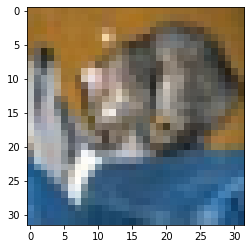

1/1 [==============================] - 0s 124ms/step
prediction:  4
actual:  [3]


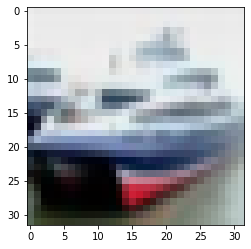

1/1 [==============================] - 0s 59ms/step
prediction:  9
actual:  [8]


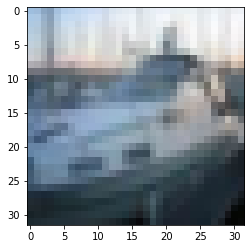

1/1 [==============================] - 0s 66ms/step
prediction:  9
actual:  [8]


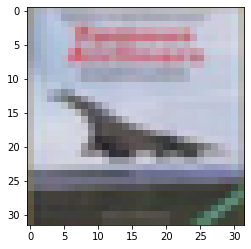

1/1 [==============================] - 0s 57ms/step
prediction:  9
actual:  [0]


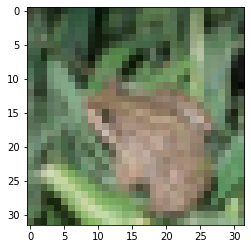

1/1 [==============================] - 0s 58ms/step
prediction:  4
actual:  [6]
1/1 [==============================] - 0s 54ms/step
model prediction:  [[0.09516513 0.10097136 0.09753569 0.11829492 0.09660376 0.08874436
  0.07553315 0.09853204 0.10394339 0.12467626]
 [0.07531148 0.06380457 0.09974565 0.12480405 0.12437609 0.10537504
  0.10300955 0.13267866 0.07450682 0.09638808]
 [0.09777231 0.08038575 0.10940787 0.12839824 0.10663778 0.11188776
  0.08682928 0.10023474 0.09335244 0.08509388]
 [0.10820495 0.09167269 0.10789974 0.13320808 0.08452196 0.10863013
  0.06366069 0.09356456 0.10971633 0.09892094]
 [0.09459682 0.10038073 0.0986618  0.11485967 0.10440889 0.09085289
  0.08226793 0.09965215 0.09853362 0.11578555]
 [0.09755357 0.10246696 0.11031573 0.12671353 0.08372451 0.0896596
  0.07447582 0.08082947 0.12541923 0.1088416 ]
 [0.10037765 0.10314807 0.10150718 0.12383687 0.08689172 0.09250785
  0.06784175 0.09215716 0.11251823 0.11921353]
 [0.07744731 0.06784567 0.0990415  0.1236877 

In [15]:
def print_prediction(model, x, y, start_index=0):
    import matplotlib.pyplot as plt
    import numpy as np
    for i in range(start_index, start_index+5):
        plt.imshow(x[i])
        plt.show()
        print("prediction: ", np.argmax(model.predict(np.expand_dims(x[i], 0))))
        print("actual: ", y[i])
print_prediction(model, x_test, y_test, 0)
print("model prediction: ",model.predict(x_test[10:20]))
print("model prediction: ",tf.math.argmax(model.predict(x_train[10:20]),axis=1))
print("training label: ",y_train[10:20,0])